In [151]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)})

In [255]:
users_data = pd.read_csv('users_data.csv', index_col=0)

In [256]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,True
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
5,8,1481466913,True,9.0,21.0,109,84,37,156,2,True
6,9,1484999497,True,0.0,0.0,3,3,0,4,1,False
7,11,1526140625,False,0.0,0.0,1,0,1,1,1,False
8,14,1436368676,True,0.0,1.0,4,3,1,9,1,False
9,16,1513162585,True,77.0,106.0,196,196,108,651,21,True


In [257]:
users_data[users_data.passed_course].day.median()

13.0

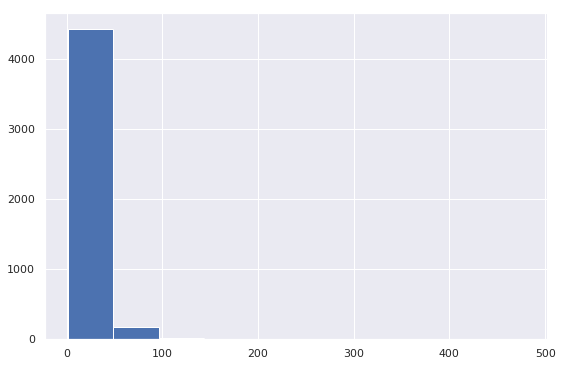

In [258]:
users_data[users_data.passed_course].day.hist()

In [259]:
events_data = pd.read_csv('event_data_train.csv')

In [260]:
events_data["date"] = pd.to_datetime(events_data.timestamp, unit='s')
events_data["day"] = events_data.date.dt.date

In [261]:
events_data.to_csv('events_data.csv')

In [262]:
user_min_time = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'min'}).rename({'timestamp': 'min_timestamp'}, axis=1)

In [263]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [264]:
users_data = users_data.merge(user_min_time, how='outer')

In [265]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [266]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [267]:
learning_time_threshold = 2 * 24 * 60 * 60

In [268]:
learning_time_threshold

172800

In [269]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [270]:
user_learning_time_threshold.head()

0    1_1473000264
1    2_1514556164
2    3_1434531276
3    5_1466329609
4    7_1521807460
dtype: object

In [271]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [272]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [273]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434513648
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434513648
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434513648
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434513648
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434513648


In [274]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]


In [275]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434513648
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434513648
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434513648
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434513648
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434513648


In [276]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [277]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [278]:
submissions_data.user_id.nunique()

9940

In [279]:
wrong_submissions_count = submissions_data[submissions_data.submission_status == 'wrong'].groupby('step_id').agg({'submission_status': 'count'})

In [280]:
wrong_submissions_count[wrong_submissions_count.submission_status == wrong_submissions_count.submission_status.max()]

,submission_status
step_id,
31978,16084


In [281]:
user_last_timestamp = submissions_data.groupby('user_id').agg({'timestamp': 'max'})

In [282]:
user_last_timestamp_with_steps = submissions_data.merge(user_last_timestamp)

In [283]:
user_last_timestamp_with_steps = user_last_timestamp_with_steps[user_last_timestamp_with_steps.submission_status =='wrong']

In [284]:
user_last_timestamp_with_steps = user_last_timestamp_with_steps.groupby('step_id').agg({'user_id': 'count'})

In [285]:
user_last_timestamp_with_steps[user_last_timestamp_with_steps.user_id == user_last_timestamp_with_steps.user_id.max()]

,user_id
step_id,
31978,156


In [286]:
events_data_train.groupby('user_id').day.nunique().max()

3

In [287]:
submissions_data["date"] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data["day"] = submissions_data.date.dt.date
submissions_data['user_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.user_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

3

In [303]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns={'day': 'unique_days'})

In [304]:
X.head()

,user_id,unique_days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,2


In [290]:
X.user_id.nunique()

8815

In [305]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns={'step_id': 'steps_tried'})

In [306]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [307]:
X.shape

(8815, 3)

In [308]:
X = X.merge(submissions_data.pivot_table(index='user_id', 
                       columns='submission_status', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index())

In [309]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [310]:
X.head()

,user_id,unique_days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,29,23,0.557692
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,2,18,77,106,0.420765


In [311]:
X = X.merge(events_data_train.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index(), how='outer')

In [312]:
X.user_id.nunique()

19234

In [313]:
X = X.fillna(0)

In [314]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [315]:
X = X[~((X.is_gone_user == False) & (X.passed_course == False))]

In [316]:
X.head()

,user_id,unique_days,steps_tried,correct,wrong,correct_ratio,discovered,passed,started_attempt,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.000000,9,9,2,9,False,True
1,3,1.0,4.0,29.0,23.0,0.557692,15,15,4,20,True,True
2,8,1.0,11.0,9.0,21.0,0.300000,109,84,37,154,True,True
3,14,1.0,1.0,0.0,1.0,0.000000,4,3,1,9,False,True
4,16,2.0,18.0,77.0,106.0,0.420765,50,49,21,117,True,True


In [317]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            13801
True           False             595
               True             4043
Name: user_id, dtype: int64

In [318]:
y = X.passed_course

In [319]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [320]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [321]:
X.head()

,unique_days,steps_tried,correct,wrong,correct_ratio,discovered,passed,started_attempt,viewed
user_id,,,,,,,,,
2,1.0,2.0,2.0,0.0,1.000000,9,9,2,9
3,1.0,4.0,29.0,23.0,0.557692,15,15,4,20
8,1.0,11.0,9.0,21.0,0.300000,109,84,37,154
14,1.0,1.0,0.0,1.0,0.000000,4,3,1,9
16,2.0,18.0,77.0,106.0,0.420765,50,49,21,117


In [322]:
y = y.map(int)

In [330]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: passed_course, dtype: int64

In [324]:
X.head()

,unique_days,steps_tried,correct,wrong,correct_ratio,discovered,passed,started_attempt,viewed
user_id,,,,,,,,,
2,1.0,2.0,2.0,0.0,1.000000,9,9,2,9
3,1.0,4.0,29.0,23.0,0.557692,15,15,4,20
8,1.0,11.0,9.0,21.0,0.300000,109,84,37,154
14,1.0,1.0,0.0,1.0,0.000000,4,3,1,9
16,2.0,18.0,77.0,106.0,0.420765,50,49,21,117


In [325]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [57]:
clf = DecisionTreeClassifier()

In [58]:
df = RandomizedSearchCV(clf, {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 20, 5),
    'min_samples_leaf': range(1, 20, 5)
}, cv=5)

In [59]:
df.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'min_samples_split': range(2, 20, 5), 'min_samples_leaf': range(1, 20, 5)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [60]:
df.best_params_

{'min_samples_split': 17,
 'min_samples_leaf': 11,
 'max_depth': 1,
 'criterion': 'gini'}

In [61]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:70%!important;height:70%!important;}</style>"
HTML(style)

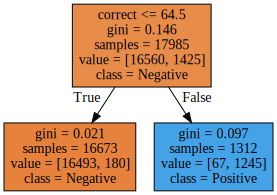

In [62]:
graph = Source(tree.export_graphviz(df.best_estimator_, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))

In [236]:
from sklearn.metrics import precision_score, recall_score

In [228]:
from sklearn.model_selection import train_test_split

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
clf = DecisionTreeClassifier()
df = RandomizedSearchCV(clf, {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 20, 3),
    'min_samples_leaf': range(1, 20, 3)
}, cv=5)
df.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'min_samples_split': range(2, 20, 3), 'min_samples_leaf': range(1, 20, 3)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [67]:
best_clf = df.best_estimator_

In [68]:
df.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 10,
 'max_depth': 13,
 'criterion': 'entropy'}

In [69]:
predictions = best_clf.predict(X_test)

In [70]:
precision = precision_score(y_test, predictions, average='macro')

In [71]:
precision

0.9696994761510891

In [72]:
best_clf.score(X_test, y_test)

0.987769624193907

In [75]:
recall

0.8835820895522388

In [73]:
recall = recall_score(y_test, predictions)

In [76]:
y_pred_prob = best_clf.predict_proba(X_test)

In [77]:
y_pred_prob

array([[0.98999756, 0.01000244],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.98999756, 0.01000244],
       [0.98999756, 0.01000244],
       [0.98999756, 0.01000244]])

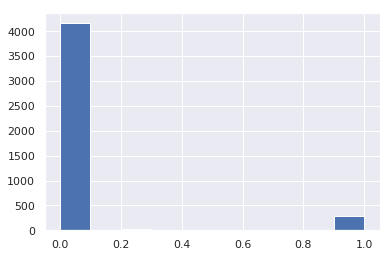

In [78]:
pd.Series(y_pred_prob[:, 1]).hist()

In [79]:
pd.Series(y_pred_prob[:, 1]).unique()

array([0.01000244, 0.        , 0.0952381 , 0.02534113, 0.01941748,
       1.        , 0.09090909, 0.02507837, 0.05263158, 0.01355932,
       0.06849315, 0.04958678, 0.8       , 0.03125   , 0.08333333,
       0.21052632, 0.9       , 0.01098901, 0.02777778, 0.63636364,
       0.01809955, 0.04878049, 0.91666667, 0.90909091, 0.3       ,
       0.18181818, 0.61538462, 0.64285714, 0.04      , 0.66666667,
       0.46153846, 0.92857143, 0.25      , 0.23076923])

In [80]:
recall

0.8835820895522388

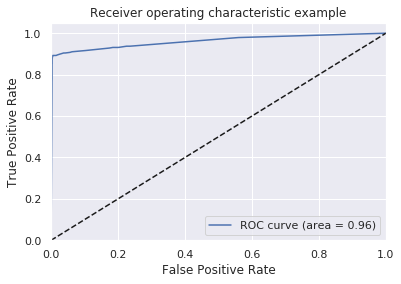

In [81]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

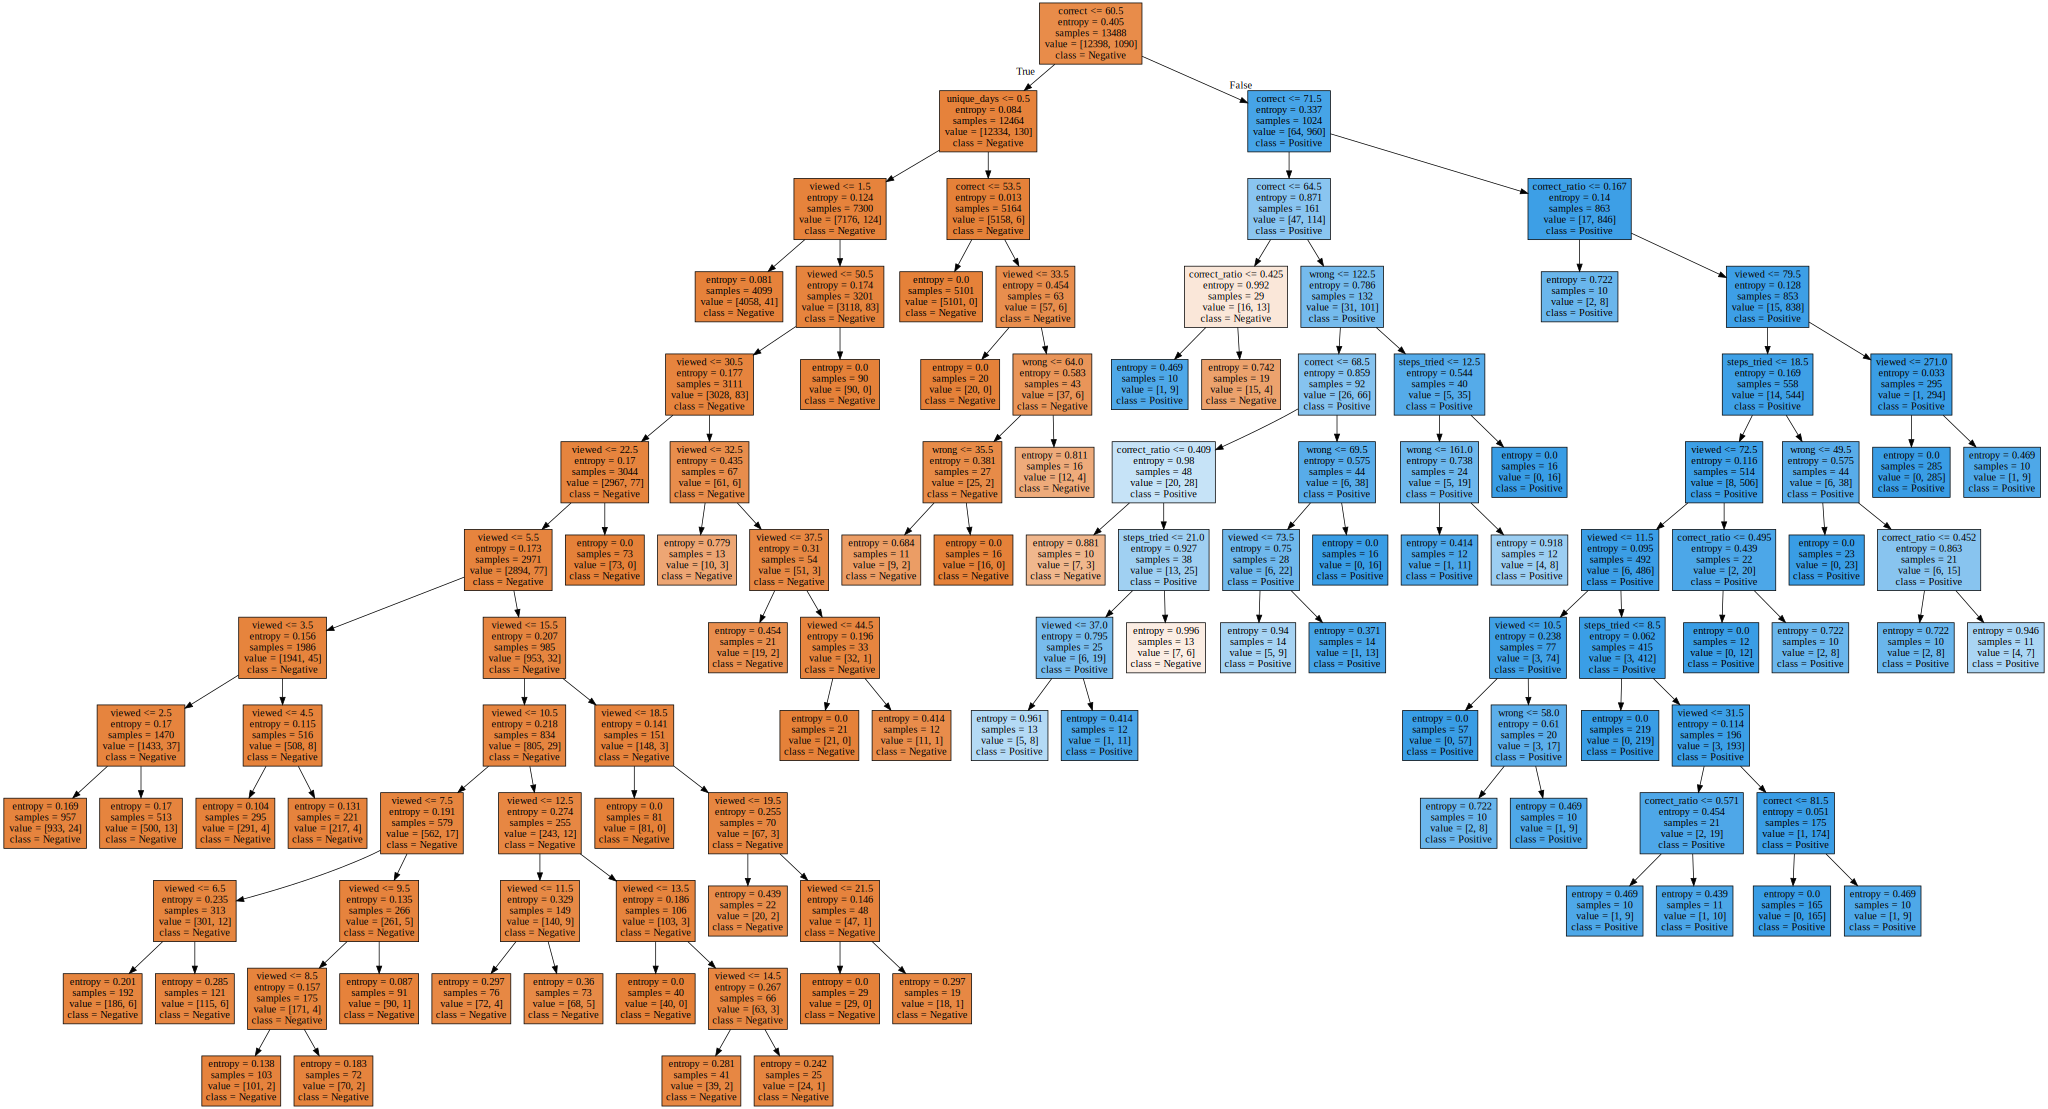

In [82]:
graph = Source(tree.export_graphviz(best_clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))

In [326]:
from sklearn.ensemble import RandomForestClassifier

In [362]:
clf_rf = RandomForestClassifier()

In [363]:
params = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': range(1, 10)
}

In [364]:
grid_search_cv = GridSearchCV(clf_rf, params, cv=5)

In [365]:
grid_search_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50], 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [366]:
grid_search_cv.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [367]:
best_rf_clf = grid_search_cv.best_estimator_

In [368]:
X_test = pd.read_csv('X_test.csv', index_col=0)

In [369]:
X_test.head()

,discovered,passed,started_attempt,viewed,correct,wrong,steps_tried,correct_ratio,unique_days
user_id,,,,,,,,,
4,1,1,0,1,0.0,0.0,0.0,0.000000,0.0
6,1,1,0,1,0.0,0.0,0.0,0.000000,0.0
10,2,2,0,6,0.0,0.0,0.0,0.000000,0.0
12,11,9,4,14,1.0,0.0,1.0,1.000000,1.0
13,70,70,35,105,29.0,36.0,29.0,0.446154,2.0


In [370]:
predictions = best_rf_clf.predict(X_test)

In [336]:
precision = precision_score(y_test, predictions)

In [337]:
precision

0.9751295336787564

In [338]:
best_rf_clf.score(X_test, y_test)

0.945119305856833

In [339]:
recall = recall_score(y_test, predictions)

In [340]:
recall

0.8042735042735043

In [382]:
y_pred_prob = best_rf_clf.predict_proba(X_test)

In [76]:
result = pd.Series(y_pred_prob[:, 1]).unique()

In [383]:
probs = pd.DataFrame(y_pred_prob[:, 1])

In [222]:
probs['user_id'] = X_test.index

In [391]:
probs = probs.set_index(X_test.index)

In [224]:
probs = probs.drop('user_id', axis=1)

In [390]:
probs = probs.rename(columns={0: 'is_gone'})

In [392]:
probs.head(20)

,is_gone
user_id,
4,0.03
6,0.03
10,0.03
12,0.21
13,0.90
15,0.05
19,0.03
21,0.90
23,0.03


In [386]:
probs.shape

(6184, 1)

In [387]:
probs = probs.round(2)

In [378]:
probs_y

user_id
4        0.939970
6        0.939970
10       0.928444
12       0.961117
13       0.416122
15       0.707173
19       0.939970
21       0.438568
23       0.939970
35       0.549166
40       0.939970
45       0.952864
55       0.822575
58       0.803388
62       0.938434
72       0.939970
74       0.827308
81       0.966784
84       0.928444
92       0.939970
93       0.939970
98       0.939970
102      0.412662
105      0.961117
107      0.939970
112      0.951558
113      0.880836
119      0.651271
124      0.795770
140      0.816977
           ...   
26696    0.939970
26698    0.869291
26699    0.938434
26701    0.939970
26706    0.870114
26710    0.939970
26713    0.841448
26720    0.939970
26721    0.939970
26724    0.938434
26729    0.740472
26730    0.939970
26735    0.939970
26736    0.939970
26738    0.939970
26743    0.939970
26744    0.952864
26745    0.939970
26748    0.952864
26758    0.951558
26768    0.939970
26770    0.952864
26775    0.315306
26780    0.776699
26

In [393]:
probs.to_csv('result.csv')

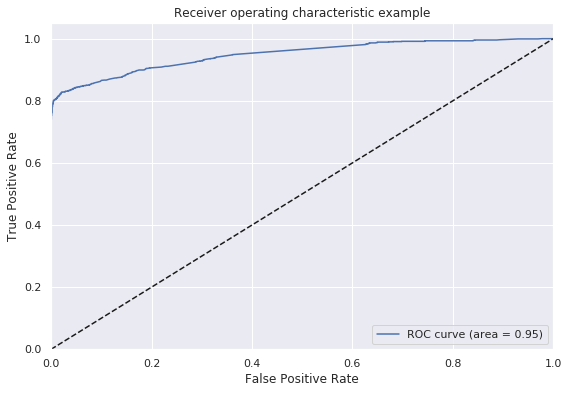

In [342]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()